In [41]:
print(__doc__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import glob
import os
from collections import defaultdict
pd.options.display.float_format = "{:.4f}".format
pd.set_option("display.max_rows", None, "display.max_columns", None)

Automatically created module for IPython interactive environment


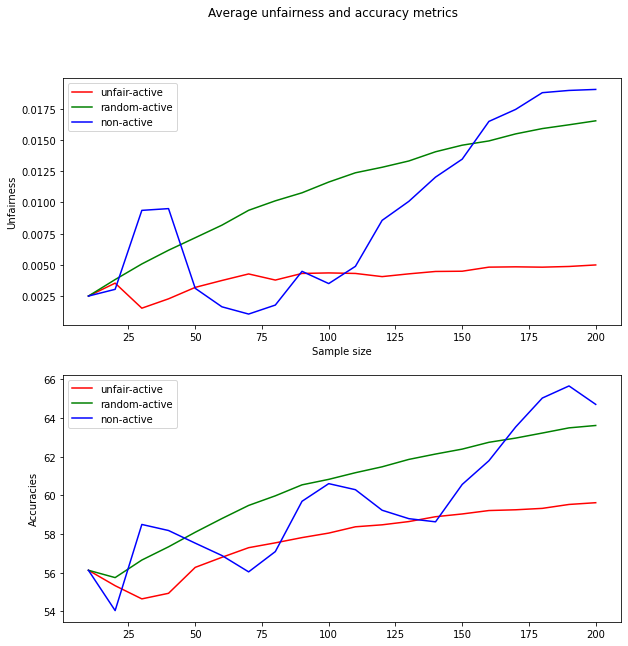

In [42]:
path = r'/Users/wenxuanhuang/Documents/Repo/Active-Learning-Performance-Benchmarking/result_log/af_test_max_corr/**/'
all_files = sorted(glob.glob(os.path.join(path, "*.csv")))

# print(all_files[0])
# avg_ur_accuracies = []
# avg_rs_fairness = []
# avg_rs_accuracies = []
# avg_nonal_fairness = []
# avg_nonal_accuracies = []
dict_ur_fairness = defaultdict(list)
dict_ur_accuracies = defaultdict(list)
dict_rs_fairness = defaultdict(list)
dict_rs_accuracies = defaultdict(list)
dict_nonal_fairness = defaultdict(list)
dict_nonal_accuracies = defaultdict(list)

for f in all_files:
    df = pd.read_csv(f)
    df = df.rename(columns={"# x_axis": "axis", " ur_accuracies": "ur_accuracies", " ur_fairness": "ur_fairness", " rs_accuracies": "rs_accuracies", " rs_fairness": "rs_fairness", " nonal_accuracies": "nonal_accuracies", " nonal_fairness": "nonal_fairness"})
    
    for i in np.arange(20):
        locate_df = df.iloc[[i]]
        dict_ur_fairness["ur_fairness"+str(i)].append(locate_df['ur_fairness'].to_string(index=False))
        dict_ur_accuracies["ur_accuracies"+str(i)].append(locate_df['ur_accuracies'].to_string(index=False))
        dict_rs_fairness["rs_fairness"+str(i)].append(locate_df['rs_fairness'].to_string(index=False))
        dict_rs_accuracies["rs_accuracies"+str(i)].append(locate_df['rs_accuracies'].to_string(index=False))
        dict_nonal_fairness["nonal_fairness"+str(i)].append(locate_df['nonal_fairness'].to_string(index=False))
        dict_nonal_accuracies["nonal_accuracies"+str(i)].append(locate_df['nonal_accuracies'].to_string(index=False))



avg_ur_fairness = defaultdict(list)     
for k,v in dict_ur_fairness.items():
    v = list(map(float, v))
    avg_ur_fairness[k] = sum(v)/ float(len(v))
results_ur_fairness = []
for k,v in avg_ur_fairness.items():
    results_ur_fairness = np.append(results_ur_fairness, v)

avg_ur_accuracies = defaultdict(list)     
for k,v in dict_ur_accuracies.items():
    v = list(map(float, v))
    avg_ur_accuracies[k] = sum(v)/ float(len(v))
results_ur_accuracies = []
for k,v in avg_ur_accuracies.items():
    results_ur_accuracies = np.append(results_ur_accuracies, v)
    
avg_rs_fairness = defaultdict(list)     
for k,v in dict_rs_fairness.items():
    v = list(map(float, v))
    avg_rs_fairness[k] = sum(v)/ float(len(v))
results_rs_fairness = []
for k,v in avg_rs_fairness.items():
    results_rs_fairness = np.append(results_rs_fairness, v)
    
avg_rs_accuracies = defaultdict(list)     
for k,v in dict_rs_accuracies.items():
    v = list(map(float, v))
    avg_rs_accuracies[k] = sum(v)/ float(len(v))
results_rs_accuracies = []
for k,v in avg_rs_accuracies.items():
    results_rs_accuracies = np.append(results_rs_accuracies, v)
    
avg_nonal_fairness = defaultdict(list)     
for k,v in dict_nonal_fairness.items():
    v = list(map(float, v))
    avg_nonal_fairness[k] = sum(v)/ float(len(v))
results_nonal_fairness = []
for k,v in avg_nonal_fairness.items():
    results_nonal_fairness = np.append(results_nonal_fairness, v)
    
avg_nonal_accuracies = defaultdict(list)     
for k,v in dict_nonal_accuracies.items():
    v = list(map(float, v))
    avg_nonal_accuracies[k] = sum(v)/ float(len(v))
results_nonal_accuracies = []
for k,v in avg_nonal_accuracies.items():
    results_nonal_accuracies = np.append(results_nonal_accuracies, v)
    
x_axis = np.arange(10,201,10)

fig, (ax1, ax2) = plt.subplots(2,figsize=(10,10))
fig.suptitle('Average unfairness and accuracy metrics')
ax1.plot(x_axis, results_ur_fairness, color='r', label='unfair-active')
ax1.plot(x_axis, results_rs_fairness, color='g', label='random-active')
ax1.plot(x_axis, results_nonal_fairness, color='b', label='non-active')
ax1.legend()
ax2.plot(x_axis, results_ur_accuracies, color='r', label='unfair-active')
ax2.plot(x_axis, results_rs_accuracies, color='g', label='random-active')
ax2.plot(x_axis, results_nonal_accuracies, color='b', label='non-active')
ax2.legend()
ax1.set_xlabel('Sample size')
ax1.set_ylabel('Unfairness')
ax2.set_ylabel('Accuracies')
plt.savefig("progression_plot_overall", bbox_inches='tight', dpi=200)
plt.show()

# fig, ax = plt.subplots()

# plt.legend()
# plt.xlabel('Unfairness')
# plt.ylabel('Accuracy')
# plt.savefig("plot_overall", bbox_inches='tight', dpi=200)
# plt.show()
